# SI 618 - Homework #1: Data Manipulation

Version 2021.02.01.01.CT

## Background

This homework assignment focuses on the analysis of historical data from the Olympic games.  The description of the data includes the following:
> This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. I scraped this data from www.sports-reference.com in May 2018.

Your main task in this assignment is to explore the data *using the data
manipulation methods we covered in class* as well as those in the assigned readings.  You may need to consult pandas documentation, Stack Overflow, or other online resources.  


A total of 100 points is available in this homework assignment, consisting of:
- 80 points for completing the specific homework questions. More comprehensive 
answers will tend to gain more points.
- 10 points for the overall quality of spelling, grammar, punctuation, and style of written responses  (see [Strunk & White](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view) for detailed specifications).
- 10 points for creating code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines.  You should review those guidelines before proceding with the assignment.


## Download the data from: 
- https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

<span style="color:magenta"> NOTE: You will only need the file named "athlete_events.csv" </span>

In [1]:
MY_UNIQNAME = 'cyuntao'  # please fill in your uniqname

In [2]:
# Run but do not modify this cell
import numpy as np
MY_UNIQHASH = hash(MY_UNIQNAME) & 2**32 - 1
np.random.seed(MY_UNIQHASH)

## Answer the following questions.
Points for each question are shown below.

For each question, you should
1. Write code using Python and pandas that can help you answer the following questions, and
2. Explain your answers in plain English. You should use complete sentences that would be understood by an educated professional who is not necessarily a data scientist (like a product manager).

### <span style="color:magenta"> Q1: 5 pt: Describe the dataset. </span>
- How many number rows and columns do you see in each data frame? 
- Are there any other interesting descriptive details?

In [3]:
import pandas as pd
athlete = pd.read_csv("athlete_events.csv")
athlete.shape

(271116, 15)

In [4]:
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
athlete.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


There are 271116 rows and 15 columns in the data frame.

Some interesting descriptive details include:
* On average, the athletes were about 25.56 years old, 175.34m, and 70.70kg when they competed in the Olympic games.
* The youngest athelete was only 10 years old, while the oldest athlete was 97 years old.
* Some athletes have participated in more than 1 team, so I would use NOC to identify the nationality of an athlete.

### <span style="color:magenta">Q2: 5 pt: Without using dataframe.describe(), calculate the median age, height, and weight for athletes in the data. Round your answer to the nearest hundredths. </span>

In [6]:
athlete.Age.median()

24.0

In [7]:
athlete.Height.median()

175.0

In [8]:
athlete.Weight.median()

70.0

For athletes in the data, the median age is 24.00 years old, the median height is 175.00m, and the median weight is 70.0kg.

### <span style="color:magenta">Q3: 5 pt: According to the data, how many unique cities have hosted the Olympic games? How many cities have hosted multiple times? Which ones? </span>
You will likely want to use drop_duplicates() on some subset of your athlete dataframe.

In [9]:
len(athlete.City.unique())

42

In [10]:
athlete.drop_duplicates(['Games','City'],
                        keep='first').City.value_counts().head(10)

Athina            3
London            3
Sankt Moritz      2
Innsbruck         2
Lake Placid       2
Paris             2
Stockholm         2
Los Angeles       2
Salt Lake City    1
Sochi             1
Name: City, dtype: int64

42 unique cities have hosted the Olympic games.

8 cities have hosted multiple times. They are London, Athina, Paris, Sankt Moritz, Lake Placid, Los Angeles, Innsbruck, and Stockholm.

### <span style="color:magenta">Q4: 10 pt: Generate histogram plots for the average age, weight, and height for Danish female athletes who competed in the 1970s. Describe the plots and point out any interesting aspects. </span>

In [11]:
danish_f_1970s = athlete[(athlete['NOC'] == 'DEN') & (athlete['Sex'] == 'F') &
                         (athlete['Year'] > 1969) & (athlete['Year'] < 1980)]
danish_f_1970s.describe()

,ID,Age,Height,Weight,Year
count,31.000000,31.000000,31.000000,27.00000,31.000000
mean,76214.709677,26.451613,169.516129,61.37037,1973.677419
std,27877.421908,9.262249,6.433615,7.03370,2.006441
min,3748.000000,14.000000,154.000000,47.00000,1972.000000
25%,61599.000000,19.000000,166.000000,57.00000,1972.000000
50%,86053.000000,25.000000,170.000000,60.00000,1972.000000
75%,93264.500000,29.500000,174.500000,64.00000,1976.000000
max,119980.000000,47.000000,184.000000,74.00000,1976.000000


<AxesSubplot:title={'center':'Age Histogram'}, ylabel='Frequency'>

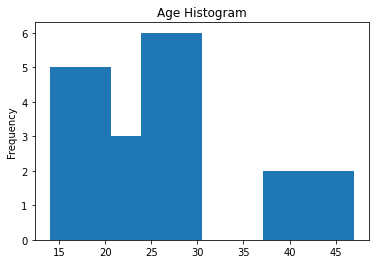

In [12]:
danish_f_1970s.Age.plot.hist(title='Age Histogram')

<AxesSubplot:title={'center':'Weight Histogram'}, ylabel='Frequency'>

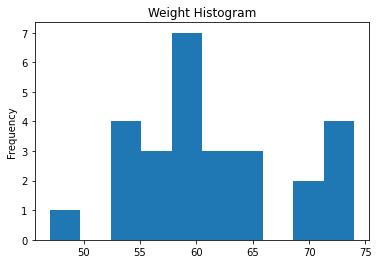

In [13]:
danish_f_1970s.Weight.plot.hist(title='Weight Histogram')

<AxesSubplot:title={'center':'Height Histogram'}, ylabel='Frequency'>

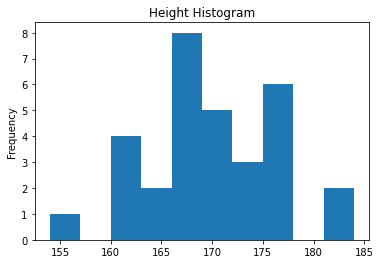

In [14]:
danish_f_1970s.Height.plot.hist(title='Height Histogram')

The average age, weight, and height for Danish female athletes who competed in the 1970s is about 26.45 years old, 169.52m, and 61.37kg.

The first plot is the age histogram for Danish female athletes who competed in the 1970s. We can see that although the age data ranges from 14 to 47, there is a gap for the age group of 30 to 37 years old. The data is concentrated in the age group of 14 to 30 years old.

The second plot is the weight histogram. The weight data ranges from 47 to 74, and there also exist some gaps. Compared to the age distribution, the weight distribution looks more similar to a normal distribution. The data is concentrated around the average.

The last plot is the height histogram. The height data ranges from 154 to 184, and there also exist some gaps. Compared to the age distribution, the height distribution also looks more similar to a normal distribution. The data is concentrated around the average.

### <span style="color:magenta">Q5: 10 pt: Which athlete competed in the most number of events? In which events did the athelete participate, and for what range of years? Which country did the athlete represent? </span>

In [15]:
athlete.drop_duplicates(['Name', 'Event'],
                        keep='first').Name.value_counts().head()

Ioannis Theofilakis          33
Alexandros Theofilakis       28
Gustaf Eric Carlberg         24
Frangiskos D. Mavrommatis    22
Gustaf Vilhelm Carlberg      22
Name: Name, dtype: int64

In [16]:
athlete_most_event = athlete[athlete['Name'] == 'Ioannis Theofilakis']
athlete_most_event.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
238513,119591,Ioannis Theofilakis,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Shooting,"Shooting Men's Free Rifle, Three Positions, 30...",NaN
238514,119591,Ioannis Theofilakis,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Shooting,"Shooting Men's Military Rifle, 200 metres",NaN
238515,119591,Ioannis Theofilakis,M,NaN,NaN,NaN,Greece,GRE,1906 Summer,1906,Summer,Athina,Shooting,"Shooting Men's Free Rifle, Any Position, 300 m...",NaN
238516,119591,Ioannis Theofilakis,M,NaN,NaN,NaN,Greece,GRE,1906 Summer,1906,Summer,Athina,Shooting,"Shooting Men's Military Rifle, 1873-1874 Gras ...",NaN
238517,119591,Ioannis Theofilakis,M,NaN,NaN,NaN,Greece,GRE,1906 Summer,1906,Summer,Athina,Shooting,"Shooting Men's Military Rifle, Kneeling Or Sta...",NaN


In [17]:
athlete_most_event.Event

238513    Shooting Men's Free Rifle, Three Positions, 30...
238514            Shooting Men's Military Rifle, 200 metres
238515    Shooting Men's Free Rifle, Any Position, 300 m...
238516    Shooting Men's Military Rifle, 1873-1874 Gras ...
238517    Shooting Men's Military Rifle, Kneeling Or Sta...
238518                 Shooting Men's Free Pistol, 50 yards
238519           Shooting Men's Free Pistol, 50 yards, Team
238520    Shooting Men's Free Rifle, Three Positions, 30...
238521    Shooting Men's Military Rifle, 200/500/600/800...
238522                Shooting Men's Free Pistol, 50 metres
238523          Shooting Men's Free Pistol, 50 metres, Team
238524             Shooting Men's Dueling Pistol, 30 metres
238525       Shooting Men's Dueling Pistol, 30 metres, Team
238526    Shooting Men's Military Rifle, Three Positions...
238527    Shooting Men's Military Rifle, Any Position, 6...
238528    Shooting Men's Military Rifle, 200, 400, 500 a...
238529    Shooting Men's Small-Bore Rifl

In [18]:
athlete_most_event.Year.unique()

array([1896, 1906, 1908, 1912, 1920, 1924], dtype=int64)

Ioannis Theofilakis competed in the most number of events. The athlete participated in the 33 events listed above, from 1896 to 1924. Specifically, the athlete competed in 1896, 1906, 1908, 1912, 1920, and 1924. The athlete represented Greece.

### <span style="color:magenta">Q6: 10 pt: How many gold, silver, and bronze medals did Sawao Kato, one of the most successful Olympic athletes of all time, win during his Olympic career? What is the breakdown of events and medal types won for each? </span>

In [19]:
athlete[athlete['Name'] == 'Sawao Kato'].Medal.value_counts()

Gold      8
Silver    3
Bronze    1
Name: Medal, dtype: int64

In [20]:
athlete[athlete['Name'] == 'Sawao Kato'].groupby(['Event', 'Medal']).size()

Event                                   Medal 
Gymnastics Men's Floor Exercise         Gold      1
Gymnastics Men's Horizontal Bar         Silver    1
Gymnastics Men's Individual All-Around  Gold      2
                                        Silver    1
Gymnastics Men's Parallel Bars          Gold      2
Gymnastics Men's Pommelled Horse        Silver    1
Gymnastics Men's Rings                  Bronze    1
Gymnastics Men's Team All-Around        Gold      3
dtype: int64

Sawao Kato won 8 gold medals, 3 silver medals, and 1 bronze medal during his Olympic career.

Specifically, 
* In Gymnastics Men's Floor Exercise, he won 1 gold medal.
* In Gymnastics Men's Horizontal Bar, he won 1 silver medal.
* In Gymnastics Men's Individual All-Around, he won 2 gold medals and 1 silver medal. 
* In Gymnastics Men's Parallel Bars, he won 2 gold medals.
* In Gymnastics Men's Pommelled Horse, he won 1 silver medal.
* In Gymnastics Men's Rings, he won 1 Bronze medal.
* In Gymnastics Men's Team All-Around, he won 3 gold medals.

### <span style="color:magenta">Q7: 10 pt: Which sport has the highest median athlete age? </span>
To determine this, you might want to plot the median age for each sport. You may want to sort the axes appropriately for your analysis.

In [21]:
median_age_bysport = athlete.groupby('Sport').Age.median().sort_values(
    ascending=False)
median_age_bysport.head()

Sport
Roque               59.0
Art Competitions    45.0
Alpinism            38.0
Polo                35.0
Equestrianism       33.0
Name: Age, dtype: float64

<AxesSubplot:title={'center':'Median Age for Each Sport'}, xlabel='Sport', ylabel='Median age'>

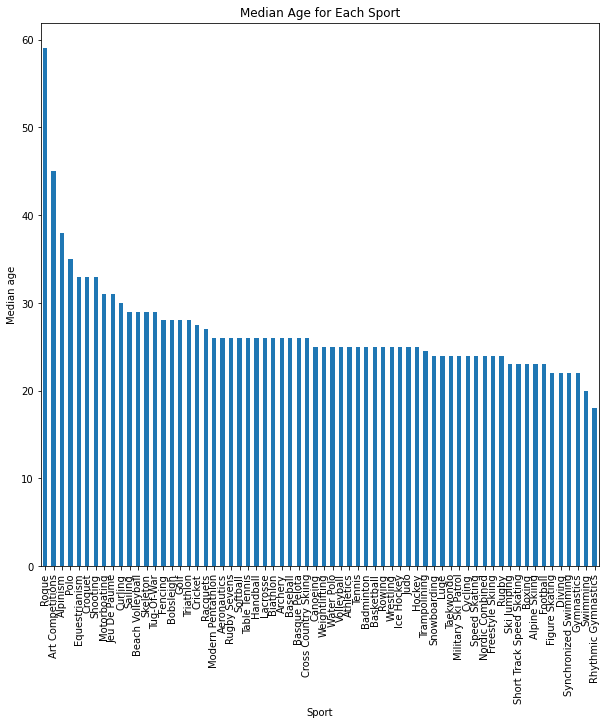

In [22]:
median_age_bysport.plot.bar(figsize=(10, 10),
                            title='Median Age for Each Sport',
                            ylabel='Median age')

The sport Roque has the highest median athlete age.

### <span style="color:magenta">Q8: 10 pt: Which country won the most medal points in all of the games held in 1992? </span>
Rank each country by a score, where 3 points are assigned for a gold medal, 2 points for silver, and 1 point for bronze.

In [23]:
record_1992 = athlete[athlete['Year'] == 1992].copy()
record_1992['Score'] = 3*(record_1992['Medal'] == 'Gold') + 2*(
    record_1992['Medal'] == 'Silver') + 1*(record_1992['Medal'] == 'Bronze')
record_1992.groupby('NOC').Score.sum().sort_values(ascending=False).head()

NOC
EUN    604
GER    500
USA    483
ESP    185
CAN    177
Name: Score, dtype: int32

The Unified Team, made of countries from the former Soviet Union except the Baltic states, won the most medal points in all of the games held in 1992.

### <span style="color:magenta">Q9: 15 pt: The Soviet–American Cold War was a period of tension between the two superpowers between approximately the end of WWII and the late 1980s with the latent ideological tension playing out in a variety of ways including the Olympic Games. Which of the two countries won the most medals during the Cold War? </span>

Note that to answer this question you will need to determine reasonable values for the beginning and end years of the Cold War. There is no single correct answer and you should justify your choices, citing your sources as appropriate.

In [24]:
record_cold_war = athlete[(athlete['Year'] > 1946) & (athlete['Year'] < 1992)].copy()
record_cold_war.groupby('NOC')['Medal'].count().sort_values(
    ascending=False).head()

NOC
URS    2503
USA    1958
GDR    1005
HUN     680
FRG     586
Name: Medal, dtype: int64

According to Wikipedia, the Cold War started in 1947, and ended in 1991 ("Cold War").

Based on this definition, the United States and the Soviet Union are the two countries won the most medals during the Cold War, and the Soviet Union won more.

References:

"Cold War." *Wikipedia*, 31 Jan. 2021, https://en.wikipedia.org/wiki/Cold_War.



## Please submit your completed notebook in .IPYNB and .HTML formats via Canvas